# Importing modules


In [55]:
# Utilize essential packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords as sw
from nltk.stem import PorterStemmer as PS, WordNetLemmatizer as WNL
from nltk.tokenize import word_tokenize as wt
from wordcloud import WordCloud as WC
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [19]:
# Fetch necessary NLTK datasets
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saiun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\saiun\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saiun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saiun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saiun\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Load Data

In [44]:
# Load CSV data
data_frame = pd.read_csv(r"reviews (1).csv")
data_frame.head()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible Update! This app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is deceivingly terrible. There are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo


# Text preprocessing

In [45]:
# Define text preprocessing function
def preprocess_text(input_text):
    processed_text = input_text.lower()  # Convert text to lowercase
    processed_text = re.sub(r"http\S+", "", processed_text)  # Remove links
    processed_text = processed_text.replace('\n', ' ')  # Remove newline characters
    processed_text = re.sub(r'\b\w*\d\w*\b', '', processed_text)  # Remove words containing numbers
    processed_text = re.sub('[^A-Za-z0-9]+', ' ', processed_text)  # Remove special characters
    processed_text = ' '.join(processed_text.split())  # Remove extra spaces
    return processed_text

In [46]:
# Apply text preprocessing to content column
data_frame['processed_content'] = data_frame['content'].fillna('').apply(preprocess_text)

# Remove stopwords

In [47]:
stop_words = set(sw.words('english'))
data_frame['processed_content'] = data_frame['processed_content'].apply(lambda x: ' '.join(word for word in wt(x) if word.lower() not in stop_words))

# Stemming

In [48]:
stemmer = PS()
data_frame['stemmed_content'] = data_frame['processed_content'].apply(lambda x: ' '.join(stemmer.stem(word) for word in wt(x)))

# Lemmatization

In [49]:
lemmatizer = WNL()
data_frame['lemmatized_content'] = data_frame['processed_content'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in wt(x)))

# Word cloud generation

In [50]:
# Function to generate word cloud
def create_wordcloud(input_text):
    wordcloud = WC(width=800, height=400, max_words=50, background_color='white', colormap='viridis').generate(input_text)
    return wordcloud


# Display word cloud

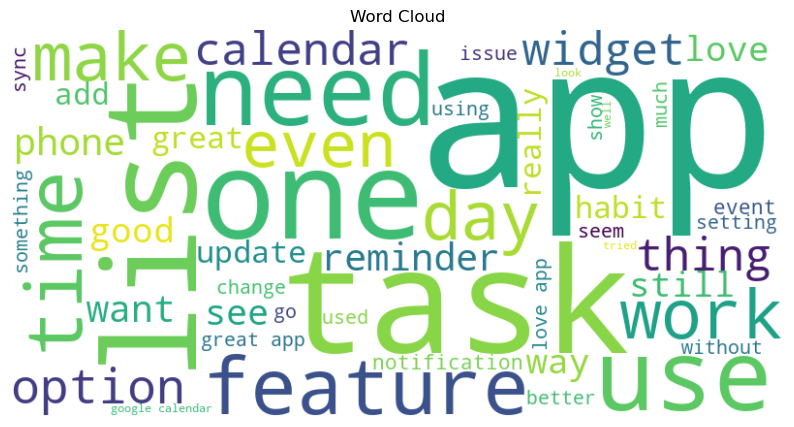

In [51]:
# Generate and display word cloud
combined_text = ' '.join(data_frame['lemmatized_content'])
wordcloud = create_wordcloud(combined_text)
plt.figure(figsize=(10, 7))
plt.title('Word Cloud')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment analysis

In [52]:
# Function to perform sentiment analysis using VADER
def analyze_text_sentiment(input_text):
    analyzer = SIA()
    sentiment_scores = analyzer.polarity_scores(input_text)
    sentiment = 'positive' if sentiment_scores['compound'] > 0.05 else 'negative' if sentiment_scores['compound'] < -0.05 else 'neutral'
    return sentiment

In [53]:
# Apply sentiment analysis and add sentiment column to dataframe
data_frame['text_sentiment'] = data_frame['lemmatized_content'].apply(analyze_text_sentiment)

# Positive, Negative, and Neutral Sentiments

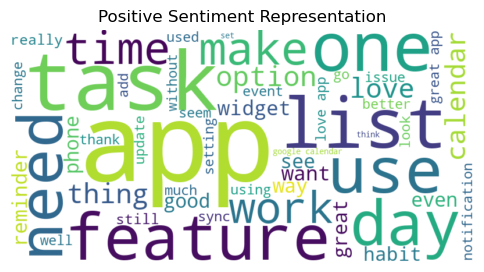

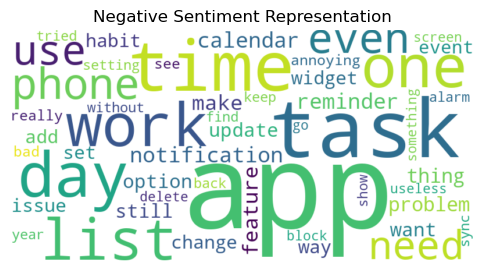

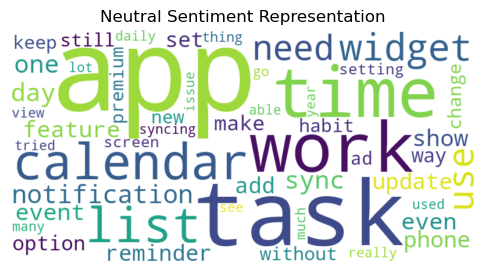

In [54]:
# Display word clouds for positive, negative, and neutral sentiments
for sentiment in ['positive', 'negative', 'neutral']:
    sentiment_text = ' '.join(data_frame[data_frame['text_sentiment'] == sentiment]['lemmatized_content'])
    wordcloud = create_wordcloud(sentiment_text)
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(sentiment.capitalize() + ' Sentiment Representation')
    plt.axis('off')
    plt.show()
